Building a time series and adding gaussian noise to the sequence, 3 vanilla auto-encoder neural netowrks to model it and comparing each model with 1, 4 and 20 nodew each. 

In [13]:
# initial imports

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# global variables
seed = 42

In [2]:
# initializing the variables for the sequence
start = 0
finish = 14 * np.pi
step = 10000

# setting the time
t = np.linspace(start, finish, step)

# creating the function
function_f = np.cos(t)

In [3]:
# since we have 10000 values, we will split the values into training: 9000 and test: 1000.
training_size = 9000
test_size = 1000
window_size = 100

# spliting into training, validation and test sets
train = function_f[: training_size]
test = function_f[training_size :]

In [4]:
# function to convert the time series
def conversion(dataset, steps):

  x = []
  y = []

  for i in range(len(dataset) - steps) :
    a = dataset[i : i + steps]
    x.append(a)
    y.append(dataset[i + steps])
  return np.array(x), np.array(y)

# converting the sets
x_train, y_train = conversion(train, window_size)
x_test, y_test   = conversion(test, window_size)

In [5]:
# adding gaussian noise to the existing data
m = 0
sigma = 0.05

train_noisy = train + np.random.normal(m, sigma, len(train))
test_noisy  = test  + np.random.normal(m, sigma, len(test))

train_noisy, train_noise_y = conversion(train_noisy, window_size)
test_noisy, test_noise_y = conversion(test_noisy, window_size)

In [9]:
# creating the sequantial model
tf.random.set_seed(seed)
def vanilla_model_seq(latent_space):
  model = tf.keras.Sequential([
      Dense(window_size, input_shape = (window_size,)),
      Dense(latent_space),
      Dense(window_size)
  ])

  model.compile(optimizer = "adam", loss = "mse")
  return model

In [10]:
# fitting the model
window_size = 100
def fit_vanilla_model_seq(model, nnodes):
  history = model.fit(train_noisy, train_noisy, epochs=20, batch_size = 16)
  reconstructed = model.predict(test_noisy)

  loss = history.history['loss']
  epochs = range(1, len(loss) + 1)
  plt.title('Noisy data vs Reconstructed data')
  plt.xlabel('Noisy data')
  plt.ylabel('Reconstructed data')
  plt.plot(test_noisy[0], label='Noisy data', color = 'b')
  plt.plot(reconstructed[0], label='Reconstructed data', color='r')
  plt.legend()
  plt.show()

Epoch 1/20


C:\Users\nomad\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


557/557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3128
Epoch 2/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0107
Epoch 3/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0106
Epoch 4/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0106
Epoch 5/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0106
Epoch 6/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0106
Epoch 7/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0107
Epoch 8/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0107
Epoch 9/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0106
Epoch 10/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0106
Epoch 11/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0107
Epoch 12/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0106
Epoch 13/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0107
Epoch 14/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0107
Epoch 15/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0106


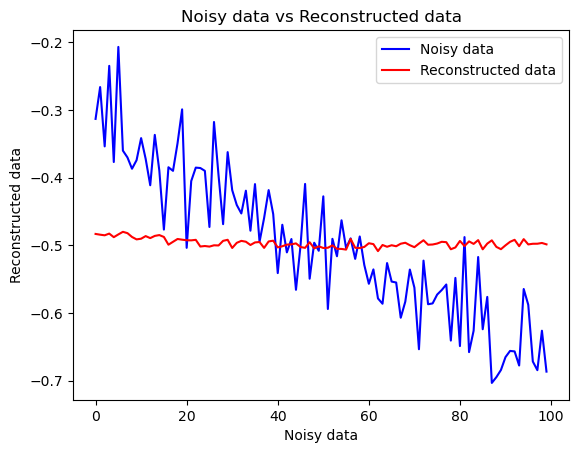

In [14]:
fit_vanilla_model_seq(vanilla_model_seq(1),1)

Epoch 1/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1657
Epoch 2/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0078
Epoch 3/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0033
Epoch 4/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0025
Epoch 5/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0025
Epoch 6/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0025
Epoch 7/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0025
Epoch 8/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0025
Epoch 9/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0024
Epoch 10/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0024
Epoch 11/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0025
Epoch 12/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0025
Epoch 13/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0024
Epoch 14/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0025
Epoch 15/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

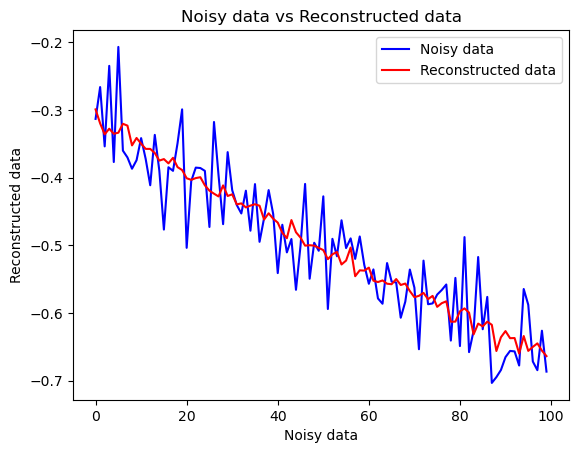

In [15]:
fit_vanilla_model_seq(vanilla_model_seq(4),4)


Epoch 1/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1097
Epoch 2/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0036
Epoch 3/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0030
Epoch 4/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0027
Epoch 5/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0025
Epoch 6/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0024
Epoch 7/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0023
Epoch 8/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0022
Epoch 9/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0022
Epoch 10/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021
Epoch 11/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021
Epoch 12/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021
Epoch 13/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021
Epoch 14/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0022
Epoch 15/20
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

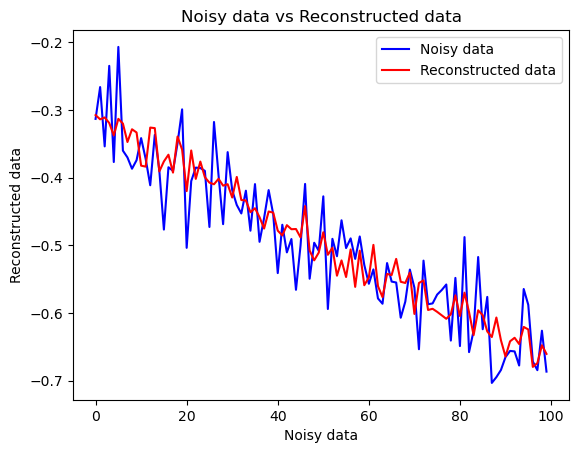

In [16]:
fit_vanilla_model_seq(vanilla_model_seq(20),20)


When using just 1 latent space, the model proved to be underfitting the noisy data. The model also couldn't follow the time series.

When using 4 latent spaces, the model seems to be fitting the noisy data better than the previous attempt. It captures the general direction of the graph which makes me believe that it is a step to the right direction.

And lastly, when using 20 latent spaces, we are starting to see that the model not only starts to overfit the data, but it starts to produce noisy data as well.

Finally, I believe that the better model out of those 3 was the one with the 4 latent spaces, as it is closer to what we are trying to achieve, a model that tries to remove the noise from the data and produce the original data that follows the time series.